<a href="https://colab.research.google.com/github/MithileshKrishnaS/Signature-Verification/blob/main/cnn4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set= train_datagen.flow_from_directory(directory= '/content/drive/MyDrive/research/noiseless/train',
                                               target_size=(64,64), # As we choose 64*64 for our convolution model
                                               batch_size=8,
                                               class_mode='categorical'  
                                               )
test_set= test_datagen.flow_from_directory(directory= '/content/drive/MyDrive/research/noiseless/test',
                                               target_size=(64,64), # As we choose 64*64 for our convolution model
                                               batch_size=5,
                                               class_mode='categorical' 
                                          )

Found 400 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [12]:
cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(128, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(10, activation='softmax'))
cnn4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 60, 60, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                      

In [20]:
cnn4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [21]:
r = cnn4.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=50,
  validation_steps=20
)

Epoch 1/10
50/50 [==============================] - 16s 295ms/step - loss: 0.4237 - accuracy: 0.8850 - val_loss: 34.3420 - val_accuracy: 0.0900
Epoch 2/10
50/50 [==============================] - 14s 290ms/step - loss: 0.2964 - accuracy: 0.9050 - val_loss: 13.9848 - val_accuracy: 0.1300
Epoch 3/10
50/50 [==============================] - 15s 290ms/step - loss: 0.3065 - accuracy: 0.8825 - val_loss: 9.2740 - val_accuracy: 0.2400
Epoch 4/10
50/50 [==============================] - 14s 289ms/step - loss: 0.3082 - accuracy: 0.8950 - val_loss: 3.1875 - val_accuracy: 0.3700
Epoch 5/10
50/50 [==============================] - 15s 290ms/step - loss: 0.3812 - accuracy: 0.8800 - val_loss: 1.1583 - val_accuracy: 0.6200
Epoch 6/10
50/50 [==============================] - 15s 291ms/step - loss: 0.2581 - accuracy: 0.9200 - val_loss: 0.1893 - val_accuracy: 0.9300
Epoch 7/10
50/50 [==============================] - 15s 290ms/step - loss: 0.2532 - accuracy: 0.9300 - val_loss: 0.8701 - val_accuracy: 0.71

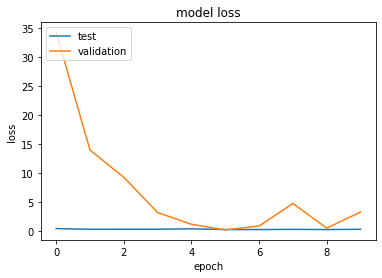

In [22]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test', 'validation'], loc='upper left')
plt.savefig('loss.png')
plt.show()

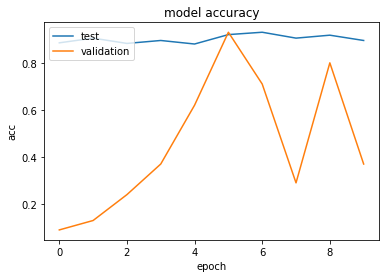

In [23]:
# Accuracy plotting
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['test', 'validation'], loc='upper left')
plt.savefig('accuracy.png')
plt.show()

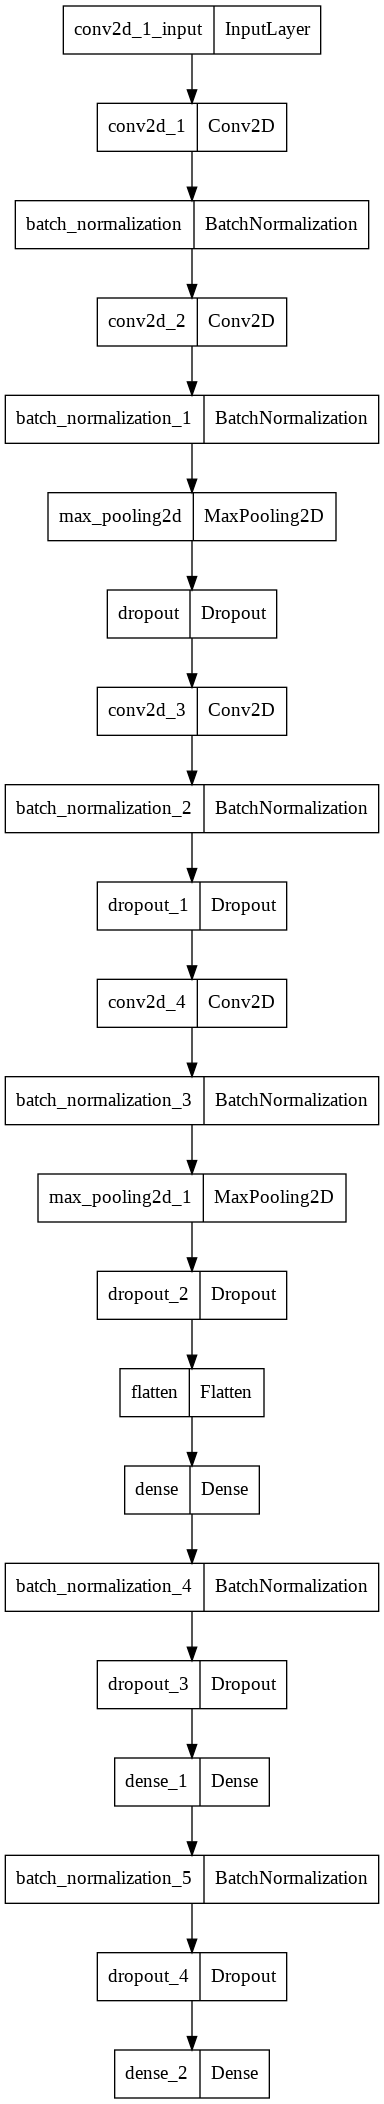

In [16]:
from keras.utils.vis_utils import plot_model
plot_model(cnn4, to_file='classifier.png')